# Probability

The goals of the exercises below are to:
1. Familiarize yourself with common probability distributions, and learn to simulate data by drawing random samples from these distributions using the numpy.random library.
1. Learn to make graphs using matplotlib.
1. Investigate the evolution of a stochastic system using a random walk with symmetric and assymetric probabilities.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#  from __future__ import division  # Python 2 users uncomment this line

# Law of large numbers

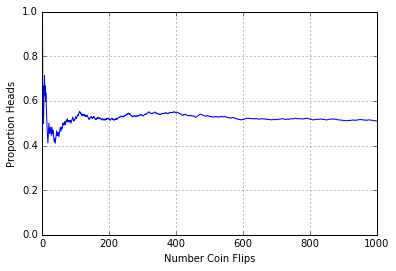

In [149]:
# Simulate the toss of a fair coin and plot the proportion of times it comes up "heads"
# Heads is represented by "1", tails by "0"
heads = np.random.randint(2, size=1000) # Random integers between 0 and 1
n_heads = [[n, sum(heads[0:n])/n] for n in range(1, len(heads))] # 
plt.plot(*zip(*n_heads))
plt.xlabel("Number Coin Flips")
plt.ylabel("Proportion Heads")
plt.ylim(0,1)
plt.grid()

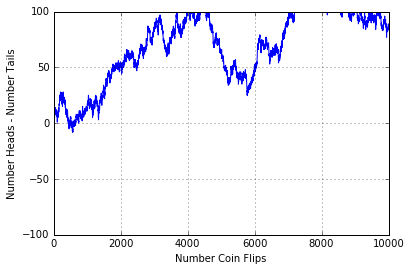

In [60]:
# Simulate the toss of a fair coin and plot the proportion of times it comes up "heads"
# Heads is represented by "1", tails by "0"
# heads = np.random.randint(2, size=1000) # Random integers between 0 and 1

outcomes = [-1, 1] # Head = +1 and Tail = -1
heads = np.random.choice(outcomes, size = 10000) # Simulate random coin flips.

n_heads = [[n, sum(heads[0:n])] for n in range(1, len(heads))] # 
plt.plot(*zip(*n_heads))
plt.xlabel("Number Coin Flips")
plt.ylabel("Number Heads - Number Tails")
plt.ylim(-100,100)
plt.grid()

### Exercise
Graph the fraction of times a "3" is rolled on a fair die as a function of the number of rolls, similar to the above for the coin flip.

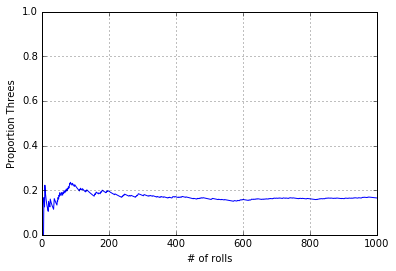

In [153]:
#rolls = np.random.randint(1,7,size=1000)

rolls = np.random.choice([0,1],size=1000,p=[5/6,1/6])

rolls_props = [ [n, sum(rolls[0:n])/n] for n in range(1,len(rolls))]

plt.plot(*zip(*rolls_props))
plt.xlim(1,len(rolls))
plt.xlabel('# of rolls')
plt.ylim(0,1)
plt.ylabel('Proportion Threes')
plt.grid()

# Probability distributions

### Probability distribution for roll of two dice

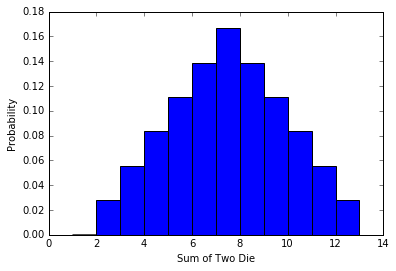

In [82]:
onedie = range(1,7)
twodie = [i+j for i in onedie for j in onedie]
plt.hist(twodie, bins=range(1,14), normed=True)
plt.xlabel("Sum of Two Die")
plt.ylabel("Probability")

### Exercise: Histogram of a sample 
1. Create a histogram of values drawn from the distributions presented using `numpy.random`. 
1. Add a line graph of the mathematical representation of the distribution.
1. Add vertical lines showing the theoretical mean, median, and mode. Add a horizontal line showing the population standard deviation. 
1. Calculate the sample mean and sample standard deviation, compare with the values for the population.
1. Vary the sample size. How large does the sample have to be to approximate the mathematical distribution?

The example below should get you started.

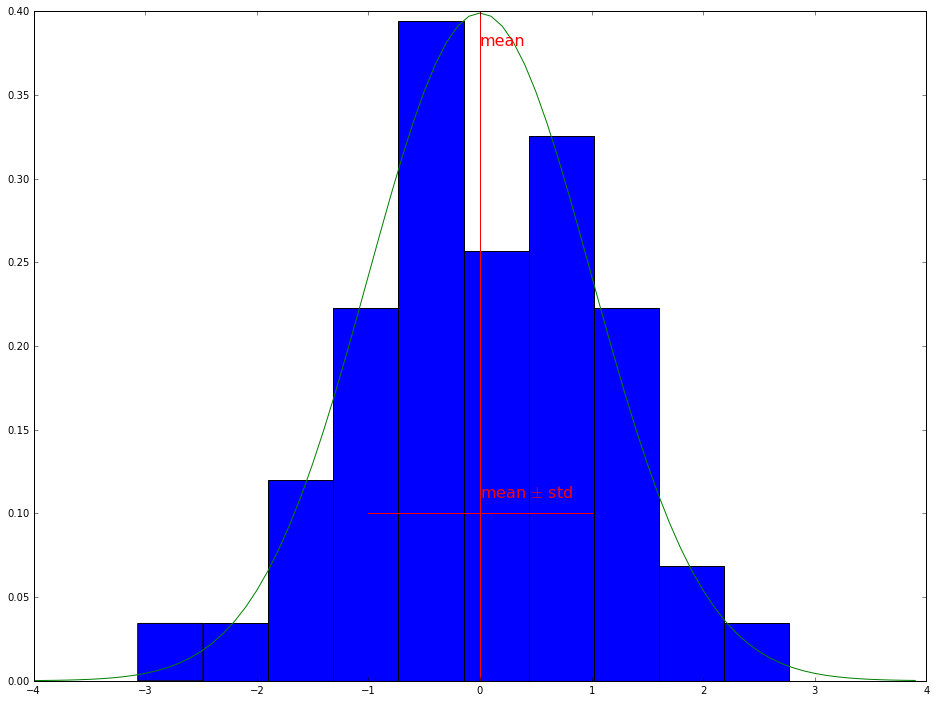

In [101]:
mean = 0
std = 1
def _gauss(x, mu=mean, sigma=std):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*pow((x-mu)/sigma,2))
gauss = np.vectorize(_gauss)
sample = [np.random.normal() for i in range(100)]
x = np.arange(-4,4,0.1)
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
ax.hist(sample, normed=True)
ax.plot(x, gauss(x))
ylim = ax.get_ylim()
xlim = ax.get_xlim()
ax.axvline(x=0, color="red")
ax.annotate("mean", xy=(mean, ylim[-1]*0.95), color = "red", fontsize=16)
ax.autoscale(False)
ax.plot((mean-std, mean+std), (0.1, 0.1), color="red")
ax.annotate(r"mean $\pm$ std", xy=(mean, 0.11), color = "red", fontsize=16)


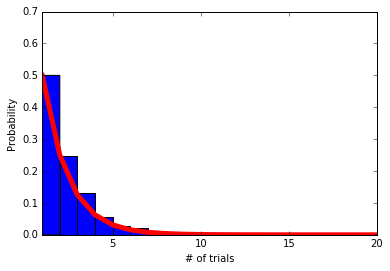

In [141]:
p = 0.5

geometric_sample = np.random.geometric(p,size=1000)

plt.hist(geometric_sample,bins=range(1,20),normed=True)
plt.xlim(1,20)
plt.ylim(0,.7)
plt.xlabel('# of trials')
plt.ylabel('Probability')

x = np.linspace(1,20,20)
plt.plot(x,(1-p)**(x-1)*p,'r',linewidth=5)

plt.show()

# 2-D Random Walk
Random walks are used to simulate a great number of processes, such as diffusion and animal foraging behavior. Here we will build a simulation of the classic "Drunkard's Walk". The drunkard walks on a two-dimensional lattice, choosing north, south, east, or west with equal probability. 

I will use this opportunity to show how to write a class in python.

In [154]:
class Walker(object):
    """ The base class for a random walker."""
    def __init__(self, x0=0, y0=0, weights=[1,1,1,1]):
        """ The walker starts at position (x0, y0). At each step he moves]
             in a direction [N,E,S,W] with probability proportional to the 
             weights given.
        """
        self.pos = np.array([x0,y0])
        self.prob = np.array(weights)/sum(weights)
        # define the directions [N,E,S,W]
        self.directions = np.array([[0,1], [1,0], [0,-1], [-1,0]])
            
    def move(self):
        """ Execute one step and return the new position."""
        direction = np.random.choice(len(self.prob), p=self.prob)
        self.pos += self.directions[direction]
        return self.pos
            

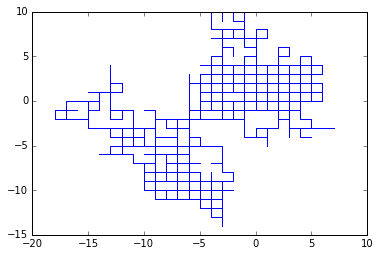

In [159]:
# Compare the path of the walker shown below with your neighbor.
mywalker = Walker()
nsteps = 1000
walk = [tuple(mywalker.move()) for i in range(nsteps)]
plt.plot(*zip(*walk))

### Exercise
What do you think the expected value of the position of the walker will be after 100 steps?

What if you change the probabilities of each direction so they are not all equal? Say there is a strong wind coming from the west, so the walker will choose west 15% of the time, E 35% of the time, N or S each 25%. How will that affect the expected value of the position after 100 steps?

Run simulations of the above scenerios and calculate the average position after 100 steps (which tends to the expected value of the position as the number of simulations goes to infinity).

In [92]:
rolls = np.random.randint(1,7,size=1000)

rolls = np.array([rolls[n]==3 for n in range(len(rolls))],dtype=int)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 

In [93]:
onedie = range(1,7)
twodie = [i+j for i in onedie for j in onedie]
print(twodie)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


In [98]:
dir(np.random)

['Lock',
 'RandomState',
 '__RandomState_ctor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_numpy_tester',
 'absolute_import',
 'bench',
 'beta',
 'binomial',
 'bytes',
 'chisquare',
 'choice',
 'dirichlet',
 'division',
 'exponential',
 'f',
 'gamma',
 'geometric',
 'get_state',
 'gumbel',
 'hypergeometric',
 'info',
 'laplace',
 'logistic',
 'lognormal',
 'logseries',
 'mtrand',
 'multinomial',
 'multivariate_normal',
 'negative_binomial',
 'noncentral_chisquare',
 'noncentral_f',
 'normal',
 'np',
 'operator',
 'pareto',
 'permutation',
 'poisson',
 'power',
 'print_function',
 'rand',
 'randint',
 'randn',
 'random',
 'random_integers',
 'random_sample',
 'ranf',
 'rayleigh',
 'sample',
 'seed',
 'set_state',
 'shuffle',
 'standard_cauchy',
 'standard_exponential',
 'standard_gamma',
 'standard_normal',
 'standard_t',
 'test',
 'triangular',
 'uniform',
 'vonmises',
 'wald',
 'warnings

In [99]:
help(np.random.geometric)

Help on built-in function geometric:

geometric(...) method of mtrand.RandomState instance
    geometric(p, size=None)
    
    Draw samples from the geometric distribution.
    
    Bernoulli trials are experiments with one of two outcomes:
    success or failure (an example of such an experiment is flipping
    a coin).  The geometric distribution models the number of trials
    that must be run in order to achieve success.  It is therefore
    supported on the positive integers, ``k = 1, 2, ...``.
    
    The probability mass function of the geometric distribution is
    
    .. math:: f(k) = (1 - p)^{k - 1} p
    
    where `p` is the probability of success of an individual trial.
    
    Parameters
    ----------
    p : float
        The probability of success of an individual trial.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        

In [104]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of
        arrays 

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.]


(0, 1)

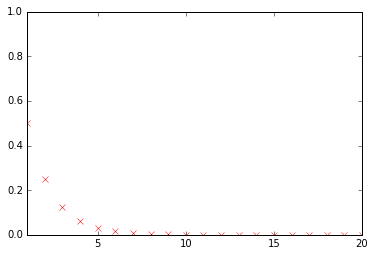

In [131]:
p = 0.5
x = np.linspace(1,20,20)
print(x)
plt.plot(x,(1-p)**(x-1)*p,'rx')
plt.xlim(1,20)
plt.ylim(0,1)

In [142]:
x = np.array([1,2,3])

In [146]:
x.var()

0.66666666666666663